# Machine Learning by Example: from Start to End

# Task 1: README!

#### The tasks in this notebook should be tackled in discussion with your peer group! 

**By asking and answering each other questions, you learn much more than doing independent work.** The article [“Embracing Digitalization: Student Learning and New Technologies” (Crittenden, Biel & Lovely 2018)](https://journals.sagepub.com/doi/10.1177/0273475318820895) shows how we learn and retain more information when we explain and discuss it with others.

Before you tackle a machine learning project you should make sure you keep the bigger picture in your head - this is your human input, skill, and imagination -  no AI can do this for you at the moment. The following sketches the typical steps involved in a machine learning project:

- Step 1: Frame Your Problem
    - What is the task? - Who will use it in what environment? What are the risks and impact?
    - How will you measure performance of your model? Measures sufficient to assess potential risks and impacts?
    - What are the assumptions? Document and review assumptions for bias. Question everything.
- Step 2: Get Your Data
    - Download your data - How will your get your data from where? Permissions and licenses? Suitable and reliable?
    - Take a quick look at the data structure - how big is it? what fields/attributes are there and how many?
    - Set aside test data - random split or stratified split? 
- Step 3: Prepare Your Data
    - Handling Text/Categorical Data
    - Scaling and Transformation
    - Separate the labels from the rest of the attributes
- Step 4: Select and Train Your Model
    - train and evaluate on the training set
    - cross-validation
- Step 6: Test on Completely New Data
- Step 7: Publish Your Results! Party! &#x1F389; &#x1F389; &#x1F389;

In this notebook, we will go through some of the key the steps. Some tasks will involve critical reflection, and others will be about coding. 

Remember that, **if you are taking more than 30 minutes to do one task without any progress**, you should probably take a break. 
- Note down what you did and what errors you got in a markdown cell. This will help you understand the recurring errors, you will understand where you left off when you come back to it later, and also help you when you discuss the problem with your peers and with the lab tutors.  

The code in this notebook is modified from that which was made available by Aurélien Géron and his fabulous book ["Hands-On Machine Learning with Scitkit-Learn, Keras & Tensorflow"](https://eleanor.lib.gla.ac.uk/record=b4094676).

## Task 1-1: Before You Start: Prepare Your Computing Environment 

### Step 1: First, open Glasgow Anywhere Remote Desktop. Use the Student Desktop. 
You can use your own machine but it can take more time to set up just so for your course work. The remote desktop, in contrast, has almost every package.

### Step 2: Go through the standard approach to opening a notebook. 
- Open a browser (recommend Chrome incognito mode). 
- Navigate to the course moodle.
- Download the notebook linked at `Machine Learning by Example from Start to End` from the course [Resources section](https://moodle.gla.ac.uk/course/view.php?id=39566#section-3). Save it in your course project folder on `One Drive - University of Glasgow`.
- Start Anaconda Navigator. 
- Launch Jupyter Notebook. 
- Navigate to your course project folder. Open up the notebook you downloaded.

Do not opening a Jupyter Notebook directly – always go through Anaconda Navigator. This allows you to clearly see which version notebook you are opening. The correct version leads to the availability of necessary Python libraries.

### Step 3: Prepare to upload material to your GitHub repository. 
Open a web browser (recommend Google Chrome in incognito mode). Navigate to GitHub and log in. Navigate to your repository for the course AI for the Arts and Humanities (A).


## Task 1-2: Checking Your Set Up

It is important not only to check that you have the correct set of software and packages, but also that the version is the right one. If versions are not compatible with your code then it will throw up errors or unexpected results. This is why you need to make these requirements known to people you share your code with (by, for example, by accompanying your code with a requirements.txt file, as included in your previous lab exrcises).

### Python

Check that your Python has version greater than 3.7 using the following code. This is what the code in the noteboook requires.

In [2]:
import sys # importing the package sys which lets you talk to your computer system.

assert sys.version_info >= (3, 7) #versions are expressed a pair of numbers (3, 7) which is equivalent to 3.7. 

Tried with numbers 9, 10, 11 and 15. Up to 11 everythings was fine, 15 threw an error.

The `assert` statement throws up an error when the statement following it is not true. If it is true, nothing will be shown. Experiment by replacing the numbers in the round brackets to be much bigger. **A Pair of numbers** like `(3, 7)` in round brackets is a data structure known as a **tuple** in programming lingo. 

### Scikit-Learn

Check that your Scikit-Learn package version is greater than 1.0.1. 

In this case you will need to import `version` which is part of the `packaging` Python library. This allows you to extract/parse version numbers for Python packages/libraries like `sklearn`.

In [3]:
from packaging import version #import the package "version"
import sklearn # import scikit-learn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1") 

Needed packages are imported and since there is no error, the package version of Scikit-Learn is greater that 1.0.1

### Fonts Used in Figures

The following code sets some font sizes to be used with `matplotlib.pyplot` (recall we used matplotlib in previous exercises to display visual information or data). You can set different sizes if you like, but too big and it won't look nice, too little and it will illegible. The code is intended to **prettify** your figures to look nicer.

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14) #general font size
plt.rc('axes', labelsize=14, titlesize=14) #font size for the titles of x and y axes
plt.rc('legend', fontsize=14) # font size for legends
plt.rc('xtick', labelsize=10) # the font size of labels for intervals marked on the x axis
plt.rc('ytick', labelsize=10) # the font size of labels for intervals marked on the y axis

### Creating the Folder for Images 

The code below creates the directory `images/classification` (if it doesn't already exist) and defines the `save_fig()` function which is used to save the figures you create in matplotlib in high resolution.

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Task 1-3: Review Machine Learning

### Step 1: Create a markdown cell to demonstrate your own reflection
- Follow the instructions in Part 1, Task 1, to open your Python notebook. And Create a Markdown cell.
- In your markdown cell embed an image or link to a diagram illustrating the workflow from data to algorithm to model and data to model to predicted output. 
    - To embed images in your markdown cell, you can use the syntax `![alt text](image.jpg)` where you replace alt text with a description of your image (keep the square brackets!) and replace image.jpg with the file path and name of your image. 
    - To include a URL, use the syntax `[title](https://www.example.com)` where you replace title  with your own description, and https://www.example.com  with your own URL. Keep all brackets intact. 
    - For your reference, you can refer to the [markdown cheat sheet](https://www.markdownguide.org/cheat-sheet/)  - note that HTML codes are also understood by your notebook.
- Explain in your markdown cell how the examples in Lectures 3 & 4 align with the workflow. For example, what is the data, what was the learning algorithm, what is the model and what did the model output in response to new data?
- Reflect on the range of ways to explain the workflow and the examples to a wider audience, for example, a museum curator?

### Step 2: Discuss and report your reflection with your group
- Get together with your peer group. Take turns to discuss your reflection above. If you have any difficulties, discuss these also.
- Note down the results of your discussion in your notebook. In particular, note down anything that help you or others learn the topic. What approach could take in your notebook to engage the wider audience with your machine learning code.
I've created a cell for you to use already below - double click on the area to start editing.

***Markdown Cell***

Step 1: 

1. For a [workflow data to algorithm to model](https://static.packt-cdn.com/products/9781788831307/graphics/assets/f366040e-1ec5-4a7b-9d0e-277f00c308e1.png) diagram click on the link
Source: Hands-On Transfer Learning with Python By Dipanjan Sarkar , Raghav Bali , Tamoghna Ghosh
2. ![image of workflow of data to model to predicted output](images/diagram.jpeg)
Source: Converting a Deep Learning Model with Multiple Outputs from PyTorch to TensorFlow by Yu Xuan Lee
3. The leukemia example in lecture 3 can be explained with the workflow in the following way: the names of the people that are being looked at are the data. The learning algorithm is the part where the machine classifies everyone called Luke as having leukemia and everone else with a different name as not having leukemia. The model then put out how many people had leukeia and how many did not, using a decision tree. This was then tested with the actual data. Overall, and also concerning new data the model put out information on wether a person had leukemia or not based on their name. The decision was made on the basis of wether a person was callded Luke. This information can be sorted into the groups right positive, false positive, right negative and false negative. 
4. The spam filtering example from lecture 4: The data in this case are emails, that can either be sorted into spam or not spam. To train the model, the data is being labeled as spam or not spam, so connections can be made. The model itself is a neural network with several hidden layers. Between the layers, connections are being made. In response to new data, the model outputs wether an unknown email is spam or not. If there is a mistake, the connections between the layers are being changed and thereby the model is being trained further to label new data more accurately in the future. 
5. To explain the workflow to a wider audience, for example a museum curator, diagrams can be a useful tool to make it easier to understand. Furthermore, examples, especially from the specific field the audience is from, are very helpful. For a museum curator, for example, the workflow can be explained using a network that classifies artworks or other pieces. Additionally, the examples can be explained by breaking them down into smaller steps and concentrating on the different parts of the workflow step by step. Besides that, a practical connection to the actual work of the audience and the real life use of the examples and models is helpful. In conclusion, there are many different ways to explain the examples and the workflow, but both examples and practical connection are valuable for it. 

Step 2:
1. reflections and procedures are very similar in the peer group, aside from the last question, which was approached in very different ways. The biggest problem was finding good pictures for the first parts of step 1, since many diagrams on the internet are either over-complicated or too specific to fit. 
2. To help others learn the topic, real world examples are important, as well as breaking down the process into smaller steps, to make them easier to understand. In this notebook, there are already a lot of information and comments around the code, which can help to engage a wider audience with the notebook. An additional step to achieve this would be to reflect on the various steps and maybe add information on erros that occured while executing the code and how to solve them, to help a wider audience get through the notebook with less problems and thereby help them stay interested in the topic and make the whole topic more approachable.

## Task 1-4: Framing the Problem

In this notebook, we will be working with two datasets:

1)	Tabular data consisting of information about houses in districts within the US state of California, and, 
2)	Image pixel data, each image representing a digit handwritten by high school students and employees of the US Census Bureau. 

The first of these datasets will be used to **predict median housing prices for a given district**. The results of the prediction will be combined with other data to determine whether it is worth investing in a given district. 

The second of these datasets will be used to **classify hand written digits**. It was originally developed as a way of sorting out the handwritten US zip codes (similar to UK postcodes) at the post office. 


### Step 1: Understand how framing the problem affects data selection

- The academic article [“Rethinking the field of automatic prediction of court decisions”](https://link.springer.com/article/10.1007/s10506-021-09306-3) by Medvedeva, Wieling & Vols (2023), to appreciate how, depending on the objectives, the characteristics of data and algorithm might differ. 
- Read the BBC article [“AI facial recognition: Campaigners and MPs call for ban”](https://www.bbc.co.uk/news/technology-67022005) to understand that the same data, depending on its use, can raise concern about AI. We will be discussing prediction court decisions further in Week 7.
- In view of the above, write down your reflection on the importance of framing your problem precisely in a notebook markdown cell - not only to define the task properly, but to understand how your machine learning model will be used down the road. 

### Step 2: How to select your algorithm

In Lecture 2, we discussed how machine learning can be divided into three types: Supervised, Unsupervised, and Reinforcement. Large part of this course is focused on supervised learning – in particular, in this notebook, we will explore this using examples of regression and classification.

**To refresh your memory, read this short article from Codecademy** – [“Regression vs Classification”](https://www.codecademy.com/article/regression-vs-classification).

- Discuss with your peer group whether regression or classification would fit better for predicting median housing prices.
- Discuss with your peer group whether regression or classification would fit better for handwritten digit recognition.
- Write down the results of the discussion. In particular, report on what you concluded after the discussion and why.

### Step 3: Before Data Collection

Once your problem is defined (e.g. predicting the median housing price of a district), you will need to collect a new data set appropriate for your task, and/or identify existing data sets that can be used for training your model. 

- Discuss with your peer group what kind of information about housing in a district you think would help predict the median housing price in the district.
- Discuss how these decisions might depend on geographical and/or cultural differences and how the information you collect would already bias the data. 

**Note these down the results of the discussions in Steps 2 & 3 in a markdown cell below.** I have already created a markdown cell for your use - just double click the area to begin editing.

***Markdown cell for discussions***

1. Framing a problem:
It is important to frame the problem precicesly for various reasons. First, it is needed to be able to choose a fitting dataset. Second, there are different types of machine learning algorithms and models, so defining the problem is necessary to be able to choose the right model or network. Additionally, a clear definition of the problem is important for being aware of possible bias integrated in the machine learning process. How a problem is being framed can have a huge impact on wether a model will be biased and in which direction that bias will lean. Therefore, it is important to frame a problem precicesly so a model can be used and understood correctly in the future and the code might be transferred to a similar problem and the model used for other things in the future.

2. Which algorithm to choose:
Predicting median housing prices: regression because the output is continous and is not being sorted into labels, since the output can be any number and is not being chosen from a specified set of labels. (comp. Codeacademy  “Regression vs Classification”)
Handwritten digit recognition: classification because the pictures are being sorted into different groups --> classes and therefore a classification algorithm is more fitting. 

3. Choosing a dataset:
The price of property or rent prices are important, depending on wether the median price for buying or renting a property is being looked at. Furhtermore, the reputation of districs, e.g. wether it is commonly considered to be a more expensive or cheaper district to live in.
While the data would very much differ depending on the geographical and/or cultural differences, the decisions on which data to collect do not vary that much. I would still try to collect data on the prices of housing and the reputation of a district. Especially the second point could lead to bias, though, depending on who is being asked about the reputation of a district - for example wether the group of questioned people is rather divers or rather homogenous. 


# Working with Data

Overviews of machine learning and AI often make it seem as though the largest part of machine learning is in training the algorithm. This is misleading. In fact, [Forbes reported that about 80% of data science is related to data preparation](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/). This includes, among other things, data cleaning, re-scaling, and labelling.

If you also include things like keeping track of what you did and why, storing and backing up data generated as well as the data used at the beginning, and recording the evaluation results, data exploration, interpretation, I would say that **95%** of machine learning is involved in **data management**. This can, in fact, be said to be a substantial part of achieving transparency, a corner stone of addressing the ethical concerns regarding AI and bias, fairness, data protection, explainability etc.

So, let's get some data!

# Task 2: Getting Data

Before anything else, you must get the data! There many ways you can get data. In previous labs, you have already seen that scikit-learn's datasets package has some datasets already available to you. You can also get data from a nuumber of places such as OECD, OpenML, Kaggle, individual repositories in GitHub. 

In reality, data is everywhere. In fact, artists who make use of AI often make their own datasets: for example, check out [Anna Ridler's shell images](https://annaridler.com/the-shell-record-2021), [Caroline Sinders' feminist dataset](https://carolinesinders.com/feminist-data-set/), and [Refik Anadol's coral images](https://refikanadol.com/works-old/artificial-realities-coral/). While these may be owned by the artists, it can inspire new ways of thinking about data.

In this task we will look at something a little less artistic! &#x1F609;

- **Example Tabular Data**: dataset comprising housing prices in California in the the United States. This dataset is available on the GitHub, courtesy of Aurelien Geron. 
- **Example Image Data**: MNIST dataset comprising images of handwritten digits. Handwritten digit recognition with the MNIST dataset is sometimes called the **"Hello World!" of machine learning**. 

We will use these datasets to carry out the prediction of 

## Task 2-1: Download the Data: Example Tabular Data

The following code defines **function** called `load_housing_data()`. This function retrieves a compressed file avaialable at `https://github.com/ageron/data/raw/main/housing.tgz` and saves it in a folder `datasets` which is in the same folder as this notebook. This will be created if it does not exist. The code will also extract the contents in the folder `datasets`. 

In [6]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data(): #defines a function that loads the housing data available as .tgz file on a github URL
    tarball_path = Path("datasets/housing.tgz") # where you will save your compressed data
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True) #create datasets folder if it does not exist
        url = "https://github.com/ageron/data/raw/main/housing.tgz" # url of where you are getting your data from
        urllib.request.urlretrieve(url, tarball_path) # gets the url content and saves it at location specified by tarball_path
        with tarfile.open(tarball_path) as housing_tarball: # opens saved compressed file as housing_tarball
            housing_tarball.extractall(path="datasets") # extracts the compressed content to datasets folder
    return pd.read_csv(Path("datasets/housing/housing.csv")) #uses panadas to read the csv file from the extracted content

housing = load_housing_data() #runsthe function defined above

### If you've already downloaded and extracted the compressed file - then the following is all you need

In [7]:
import pandas as pd
from pathlib import Path

housing = pd.read_csv(Path("datasets/housing/housing.csv"))

## Take a Quick Look: housing data

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The result above tells you how many attributes (e.g. longitude, latitude) characterise the dataset. How many are there? The data type float64 is a numerical data type. So, the table above also tells you how many attributes are not numerical. 

In [9]:
# add housing head to get a better picture of what the dataset looks like (helps myself with getting an overview of the data)
# the head() method outputs the first five rows of a dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing["ocean_proximity"].value_counts() # tells you what values the column for `ocean_proximity` can take

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

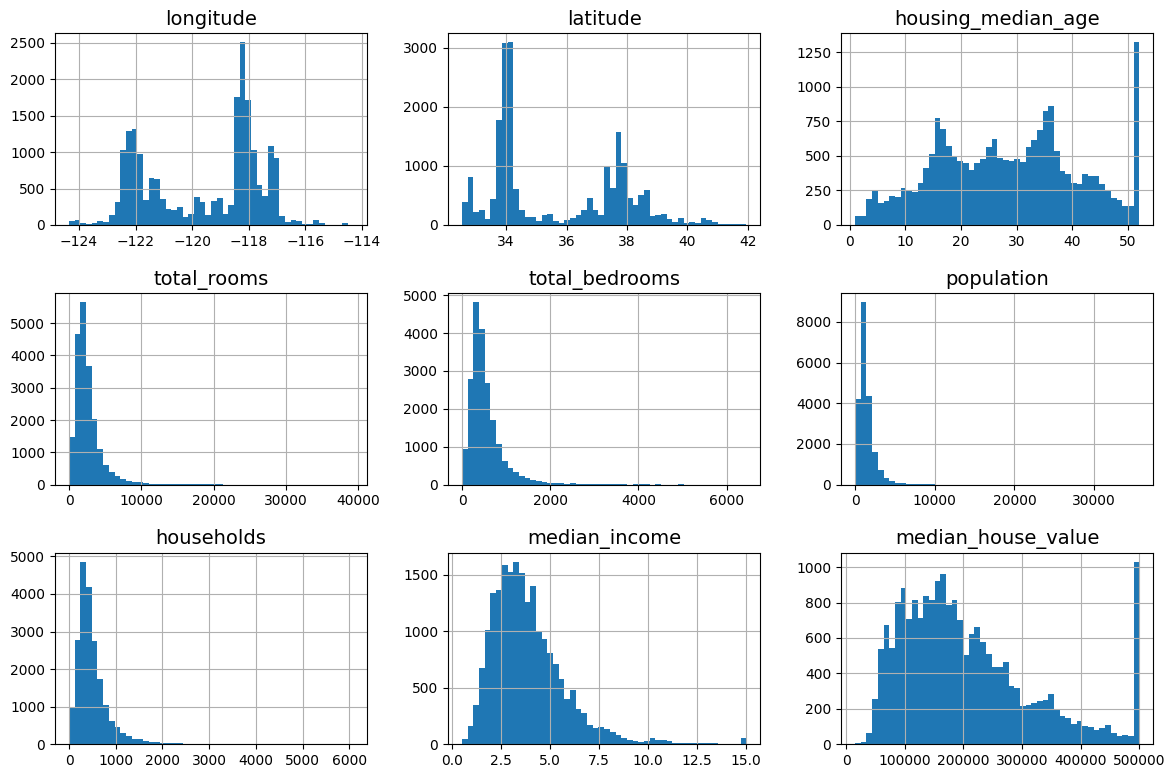

In [11]:
housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

Finally you can run `housing.describe()` to get a summay of the data set `housing`.

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


At this point you should stop looking at the data until you have set aside test data. This is to prevent inadvertent bias creeping into the machine learning process.

## Task 2-2: Download the Data: Example Image Data

In contrast to tabular data, image data sets are not always read in using pandas. Technically you can do this (as the line below commented out suggests) but as there are no features human-friendly features (such as, median income etc.) - only pixel information, it does not always help to load it as a pandas dataframe, unless the model requires it to be so. Use the command `type` to see what data type `mnist` is - you can see that it is not a `pandas.core.frame.DataFrame`. Dataframes are not the preferred **data structure** for image data.

In [13]:
from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

#mnist_dataframe = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)

## Take a Quick Look: MNIST

The command `mnist.info()` will not work here, to get information about the dataset content, because it is not a pandas dataframe. However, since your dataset is part of the `sklearn.datasets` universe, similar tools as those used in the previous lab exercises apply: for example, the keyword `DECSR` - as demonstrated in the first code cell below. The `print` command can be used in conjunction to get some useful context of the dataset structue and origin. 

In [14]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

## Task 2-3: Review the data description above with your group.

What is the size of each image?

Examine how LeCunn, Cortes, and Burges reorganised the NIST data as MNIST. Note that they remixed the data in two ways to create different a training dataset and test dataset. What they did do? Why do you think they did this? Was it justified? 

Write down the results in a markdown cell below. I have already created a markdown cell below - just double click to edit the content.

***Mark Down cell for critique***

1. The size of the images is 20x20 pixels and made to fit a 28x28 field 
2. The training and test set were organized by writers, meaning that no images by the same writer are to be found in both datasets. They are only either in the training or in the test set, never in both. This was probably done to make sure that the model is actually learning to recognize handwritten digits and does not simply remeber a certain style by training and testing on similar digits. Therefore, the machine trains and learns on certains writers and is tested on others. Because of that, the images in the test set are wholly unknown to the machine when first running the test data, meaning that the dataset can actually be used to test the accuracy of the recognition. This probably increases the accuracy of the model when using it for unknown digits later on, which thereby justifies the method.

### To see a full list of keys other than `DESCR` which is available to this dataset You can use the command `mnist.keys()` to see more keys available - run the code below.

In [15]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Task 2-4: Identifying the Dimension of Images

You may recognise some of the keys listed above for `mnist.keys()`. For example, you should have seen the key `data` and `target` already in earlier labs. The former will return the image pixel data, while the `target` key will return the labels (the categories or classification) assigned to each of these images. 

- Create a code cell below to use these keys in Python, to use the `shape` command to verify the number of images in the dataset and how many features (e.g. pixels) represents the image. Print out the shape and the target categories. 

I have created a cell for you below with the data and target assigned to the **variables** `images` and `categories`. Add a line to print out the shape of the images and the list a assigned categories. Single click on the area to start editing. 

In [16]:
# cell for python code 

images = mnist.data
categories = mnist.target

# insert lines below to print the shape of images and to print the categories.
print(images.shape)
print(categories)




(70000, 784)
['5' '0' '4' ... '4' '5' '6']


Note:  shape method for dataframes - result: 70.000, 784 meaning 70.000 images in total which fits the description of the training and test set (mentioned 30.000 from SD-3 and 30.000 from SD-1 for training set and 5.000  from SD-3 and 5.000 from SD-1 for test set in description) and 784 referring to the size of the fields (aforementioned 28x28 = 784)

Let's take a look at one of the digits in the dataset - the first item.

In [17]:
#extra code to visualise the image of digits

import matplotlib.pyplot as plt

## the code below defines a function plot_digit. The initial key work `def` stands for define, followed by function name.
## the function take one argument image_data in a parenthesis. This is followed by a colon. 
## Each line below that will be executed when the function is used. 
## This cell only defines the function. The next cell uses the function.

def plot_digit(image_data): # defines a function so that you need not type all the lines below everytime you view an image
    image = image_data.reshape(28, 28) #reshapes the data into a 28 x 28 image - before it was a string of 784 numbers
    plt.imshow(image, cmap="binary") # show the image in black and white - binary.
    plt.axis("off") # ensures no x and y axes are displayed

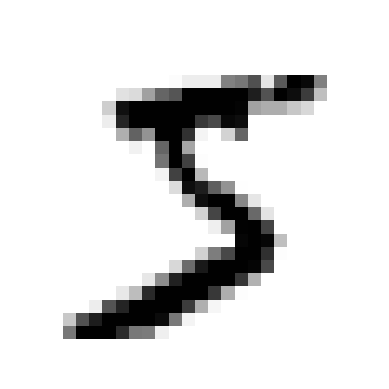

In [18]:
# visualise a selected digit with the following code

some_digit = mnist.data[0]
plot_digit(some_digit)
plt.show()

# Task 3: Setting Aside the Test Data

To set aside test data, you need to take shuffled and stratified samples. 

## Why Do We Shuffle

The dataset you are working with could be ordered in a specific way (for example, all the data points in a specific class all at the top). If you select a percentage of 20% from the top, you could get data points in only specific classes. By shuffling we can avoid this. As it happens `sklearn` has a nifty function to allow you to split the data inclusive of splitting. This function is called `train_test_split`. See it in action below, using the housing data.

In [19]:
from sklearn.model_selection import train_test_split

tratio = 0.2 #to get 20% for testing and 80% for training

train_set, test_set = train_test_split(housing, test_size=tratio, random_state=42) 
## assigning a number to random_state means that everytime you run this you get the same split, unless you change the data.

## Why Do We Stratify

If the dataset is skewed so that it contains more samples of a specific kind more than others, sampling randomly will result in your test data not representing the population you would like to test. An example of the estimated probability of getting a bad sample that does not reflect the actual population is provided below. The US population ratio of females in the census is 51.1%. The following is the probability of getting a sample with less than 48.5% or greater than 53.5% females if you take a random sample withoput stratifying: approximately **10.71%** 

In [20]:
# extra code – shows another way to estimate the probability of bad sample

import numpy as np

sample_size = 1000
ratio_female = 0.511

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

## Task 3.1: Stratified Sample: Housing Data

The following code adds a column to the `housing` data to create bins of data according to interval brackets of median income of districts. This is a first step to creating a stratified sample across different income brackets.

In [21]:
import numpy as np
import pandas as pd

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

The following code uses the above bins to implement startified sampling - that is, it will randomly sample 20% (because we set test ratio `tratio` to 0.2) from each income bracket defined above.

In [22]:
from sklearn.model_selection import train_test_split

tratio = 0.2 #to get 20% for testing and 80% for training

strat_train_set, strat_test_set = train_test_split(housing, test_size=tratio, stratify=housing["income_cat"], random_state=42)

The code below prints out the proportion of each income category in the stratified test set above.

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set) #Prints out in order of the highest proportion first.

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Note the attribute `random_state`. Setting this to a specific number like 42 **keeps the split the same everytime you run the code**. Keep in mind that it will not stay the same if you change the underlying dataset (e.g. adding more). 

Discuss with your peer group, why a stratified sample based on median income is reasonable. Create a markdown cell below to report on the results of the discussion. I have already create one below, so just double click to edit.

***Markdown cell***
A stratified sample is reasonable because it helps to prevent certain bias in the conclusions that are being drawn from the use of the dataset. Using the median means that it prevents an odd number from having too much influence. For example in a row of numbers: 1 1 1 1 1 2 9 the median is 1, which is a closer representation of the actual numbers than the averaqge, for which the result would be around 2.3, which is much higher than most of the numbers of the row. In the example of income in housing districts, the median is useful so one person earning for example much more money than the rest does not impact the numbers that much, since that could have a severe impact on the community, when it comes to housing prices or funding. To stratifie the sample is reasonable for a similar reason, so that one outlier does not imapct the result too much and the data is a more accurate representation of the actual state of things.   

In [24]:
type(mnist.data)

numpy.ndarray

Note: if taking a break between Task 2 and 3 and closing the notebook, the cells in which the datasets housing and mnist are being imported have to be executed again to prevent an error.

## Task 3.2: Setting Aside Test Set for Image Data 

In the case of `mnist` the data is already cleaned prepared, scaled and ordered, so that the training data is the first 60,000 images, followed by the test data which is the last 10,000 images. So you need not shuffle and stratify nor use `train_test_split`. Instead, you can use the following code to set aside your test dataset. The data type of `mnist.data` is `numpy.ndarray` (you can verify this with the command `type`). 
- By using a colon and then 60000 in a square bracket after `mnist.data`, you are telling the computer that you want all the items up until the 60000th item (not including the 60000th) in the array `mnist.data`. We assign this to the **variable** `X_train`. 
- Likewise, the first 60000 categories corresponding the the first 60000 images are assigned to the **variable** `y_train`. 
- By using a colon after 60000, you are telling the computer you would like all the items from the 60000th onwards.

It is machine learning convention to use upper case `X` for variable names associated with data and lower case `y` in the variable names associated to labels (or categories/classes).

In [25]:
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

# Task 4: Selecting and Training a Model

You are finally ready to select and train your model. In the following code, we will use linear **regression for the prediction of district housing prices**, and a **convolutional neural network** for classification of hand written digits. For linear regression, we will use `Scikit-Learn`. For the convolutional neural networks we will use the `tensorflow` library with `keras`. Regardless of the model, the general flow is similar:  

- Import the model from the relevant library. 
- Create an untrained model instance. 
- Fit the model to your training data.

## Task 4-1: Housing Data and Linear Regression

With linear regression, you need data, whose values are continuous - not discrete values such as categories. Note that it is not enough for the values to be numbers, which can also be categories (for example, your place in a queue is a number but is never a fraction like 1.33). The feature `income_cat` is another category expressed as a number. 

Before doing anything else, let's assign a copy of the stratified training set we created earlier to the variable `housing`. You should always work with copies of data and never look at the test set in case we inadvertently use information in the test to improve the performance (**data snooping bias**).

To do this use the following code.

In [26]:
housing = strat_train_set.copy()

### Step 1: Checking Correlations: Training Set

Linear regression in essence works by picking up on correlations between features. So it can be useful to explore the correlations especially between the target value you are trying to predict `median_house_value` and the other features in the dataset, e.g. `median_income`.

The training set we have is of type `pandas.DataFrame`.  For pandas, dataframes have the function `corr` which calculates the correlations for you. The code is below - first it calculates all the correlations between all the pairs of features and saves it in variable `corr_matrix`. 

We can take a look at correlations for `median_house_value` by using that feature name in a square bracket (**with quotation marks!**). the last part `sort_values(ascending=False)` sorts the correlation to display it in descending order of correlation (that is, most correlated fetures are listed first).

In [27]:
corr_matrix = housing.corr(numeric_only=True) # argument is so that it only calculates for numeric value features
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

### Step 2: Visualise the Correlations

Pandas also can visualise these correlations as a graph for you. In the code below, we have selected four features (see the variable with that name), to 4 x 4 grid of graphs.

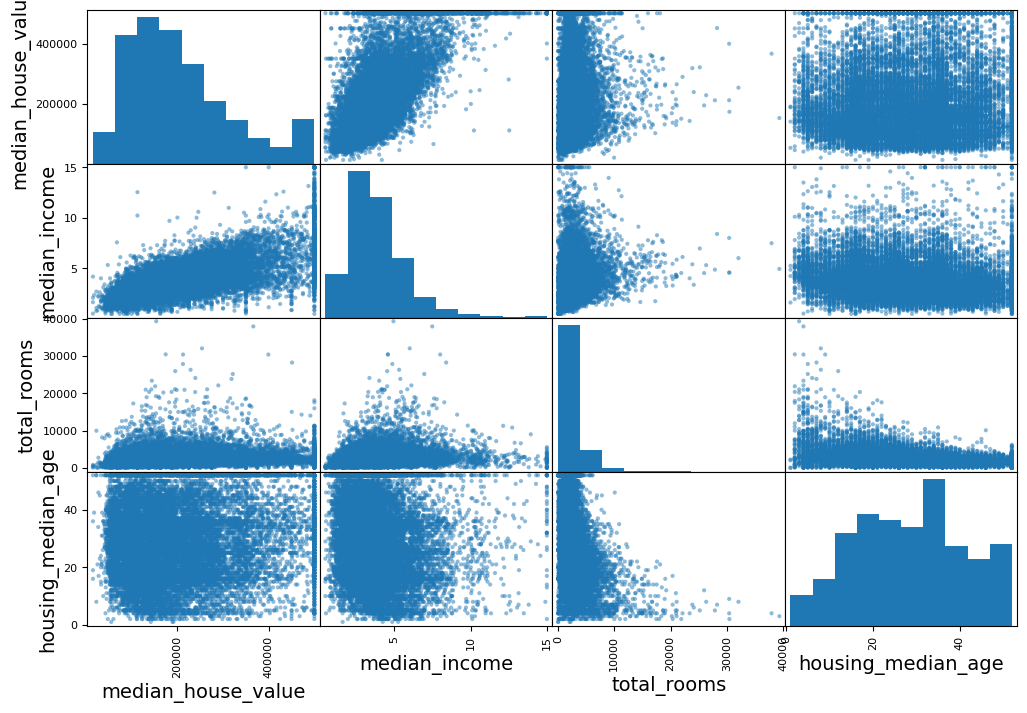

In [28]:
from pandas.plotting import scatter_matrix

features = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[features], figsize=(12, 8))
#save_fig("scatter_matrix_plot")  

#The line above is extra code you can uncomment (remove the hash at the begining) to save the image.
#But, to use this, make sure you ran the code at the beginning of this notebook defining the save_fig function

plt.show()

### Step 3: Separate the Target Labels from Your Data

In any machine learning task, you need to provide the data and the target Label separately to the machine learning algorithm. Otherwise, they have no way of knowing which of the features is the target label. In our scenario, the label for the housing data is the `median_house_value`. When your data is in a padas dataframe format, you can simply 1) drop the column with the label to get the data, and, 2) get the column for the target label, to get the labels.

In [29]:
housing = strat_train_set.drop("median_house_value", axis=1) ## 1)
housing_labels = strat_train_set["median_house_value"].copy() ## 2)

### Step 4: Look for Missing Values in the Data

When working with tabular data, it is quite common to find that some rows are missing values for some of the columns. If you run the `info` command for dataframes (we've done this in [Task 2-1](#Task-2-1:-Download-the-Data:-Example-Tabular-Data) above!). 

- Running the code will show the total number of entries. By comparing that number to the number of Non-Null entries for each feature (e.g. `total_bedrooms`) you can see whether there are missing values. 
- If there are no missing values, these numbers should be the same!

How many values are missing for the number of `total_bedrooms'? 

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16344 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


### Step 5: Handling Missing Values

To handle the missing values, you need a code in place to tell the machine what to do if there are missing values. In-depth discussion of handling missing values is beyond the scope of this course, but there are three common ways of handing these:

- (Option 1) Drop the row with missing value. This causes you to lose data points. In our scenario with the housing data, 168 rows will be removed.
- (Option 2) Drop the column with missing values. This causes you to lose one of your features.
- (Option 3) Fill in the missing value with some value such as the median or mean or fixed value that makes sense. This is called **imputing**.

Depending on which approach you take, the performance of your AI could be different. Also, note that, **with Option 1, you will have to remove the corresponding rows in `housing_labels` before using these in a machine learning task**. Following are codes from each of these approaches. Read the comments included in the code for understanding what each cell is doing.

In [31]:
# this is the code for Option 1 above. 
housing_option1 = housing.copy() #This makes a copy of the data to variable housing_option1, so that we don't mess up the original data.

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1 - dropping the rows where total_bedroom is missing values.

housing_option1.info() #look for missing values after rows have been dropped

<class 'pandas.core.frame.DataFrame'>
Index: 16344 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16344 non-null  float64 
 1   latitude            16344 non-null  float64 
 2   housing_median_age  16344 non-null  float64 
 3   total_rooms         16344 non-null  float64 
 4   total_bedrooms      16344 non-null  float64 
 5   population          16344 non-null  float64 
 6   households          16344 non-null  float64 
 7   median_income       16344 non-null  float64 
 8   ocean_proximity     16344 non-null  object  
 9   income_cat          16344 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [32]:
housing_option2 = housing.copy() #This makes a copy of the data to variable housing_option1, so that we don't mess up the original data.

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2 - dropping the column associated with total_bedrooms

housing_option2.info() # checking for missing values in the new data after column has been dropped

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   population          16512 non-null  float64 
 5   households          16512 non-null  float64 
 6   median_income       16512 non-null  float64 
 7   ocean_proximity     16512 non-null  object  
 8   income_cat          16512 non-null  category
dtypes: category(1), float64(7), object(1)
memory usage: 1.1+ MB


In [33]:
housing_option3 = housing.copy() #This makes a copy of the data to variable housing_option1, so that we don't mess up the original data.

median = housing["total_bedrooms"].median() # calculating mean of the value for total_bedrooms to use in filling missing values
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3 - filling missing values with the median

housing_option3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16512 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


#### You can also use `SimpleImputer` from the `sklearn.impute` library to fill missing values with the median

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # initialises the imputer

housing_num = housing.select_dtypes(include=[np.number]) ## includes only numeric features in the data

imputer.fit(housing_num) #calculates the median for each numeric feature so that the imputer can use them

housing_num[:] = imputer.transform(housing_num) # the imputer uses the median to fill the missing values and saves the result in variable X

### Step 6: Scaling Your Features

Machine learning algorithms learn better when similar scales are used across all the features. For example, the numeric range of values for `total_rooms` will be totally different from `median_income`.

Test this with he **min** and **max** values after running the pandas `describe()` function. Code below.

In [35]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,537.881298,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,421.831667,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,297.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,642.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


You can see that all the features have very different ranges. Bringing these in alignment is called **feature scaling**. There are a number of ways to scale features. Scikit-Learn provides something called MinMaxScaler which scales the values to fit into a range defined by you. Below, the code is provided for when you are fitting it into the range from -1 to 1. AI algorithms often like the mean to be placed at zero, so best to set a range with zero as the mid point value. 

In [36]:
from sklearn.preprocessing import MinMaxScaler # get the MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) # setup an instance of a scaler
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)# use the scaler to transform the data housing_num

Alternatively, Scikit-Learn also provides a method called StandardScaler. This method tries normalise the distributional characteristics by considering mean and standard deviation for each feature, and normalising the values to have standard deviation 1. But, even without knowing the mathematical details, we can simply employ the tools provided by `sklearn` - example below.

In [37]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [38]:
housing_num[:]=std_scaler.fit_transform(housing_num)

### Step 7: Train a Linear Regression Model

In the first instance we will use the data resulting from the `SimpleImputer` (with the **median** as a strategy) and use   `StandardScaler` for scaling the features. Before we train the Linear Regression model for predicting median housing prices for districts, we need to also apply the scaling to the target labels (in our case, the known median housing prices). The code is provided below.

In [39]:
from sklearn.preprocessing import StandardScaler #This line is not necessary if you ran this prior to running this cell. 
#We are however including it here for completeness sake.

target_scaler = StandardScaler() #instance of Scaler
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) #calculate the mean and standard deviation and use it to transform the target labels.


### Training Step

In [40]:
from sklearn.linear_model import LinearRegression #get the library from sklearn.linear model

model = LinearRegression() #get an instance of the untrained model
model.fit(housing_num, scaled_labels)
#model.fit(housing[["median_income"]], scaled_labels) #fit it to your data
#some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

#scaled_predictions = model.predict(some_new_data)
#predictions = target_scaler.inverse_transform(scaled_predictions)

LinearRegression()

In [41]:
some_new_data = housing_num.iloc[:5] #pretend this is new data
#some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [42]:
print(predictions, housing_labels.iloc[:5])

[[275731.11448446]
 [331676.57911294]
 [137497.17946945]
 [126904.73895815]
 [302837.63110099]] 13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64


In [43]:
# extra code – computes the error ratios discussed in the book
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

NameError: name 'housing_predictions' is not defined

### Step 8: Cross Validation

As mentioned in Lecture 4 - pre-recorded lecture - having one training set and one test set to check performance is limited in producing a robust AI model. What you really want to see is a stable performance across many training sets and test sets. IN the first stance you want to test the model on the training set.

One way to evaluate your model before testing on the new data (the data you set aside as your test data) is cross validation. This where you split your training data into many pieces, then leave on of the pieces out for testing.The code below does that!

In [44]:
from sklearn.model_selection import cross_val_score

rmses = -cross_val_score(model, housing_num, scaled_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [45]:
pd.Series(rmses).describe()

count    10.000000
mean      0.600606
std       0.007835
min       0.591452
25%       0.594204
50%       0.598207
75%       0.608375
max       0.611381
dtype: float64

## Task 4-2: Hand Written Digit Classification

As mentioned earlier, as an example, for the hand written digits, we will use a specific kind of neural network model called a **Convolutional Neural Network (CNN)** model. In the lectures, we learned about general neural networks but not CNN. If you want to get a feel for CNNs, you can watch the Stat Quest Video [Neural Networks Part 8: Image Classification with Convolutional Neural Networks (CNNs)](https://www.youtube.com/watch?v=HGwBXDKFk9I). If you feel confident to go deeper, Chapters 19 and 22 of Russell and Norvig's Book ["Artificial Intelligence: a modern approach"](https://eleanor.lib.gla.ac.uk/record=b3897063) is an excellent read, not to mention Géron's book ["Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow"](https://eleanor.lib.gla.ac.uk/record=b4094676).

For this task, **we will move away from `sklearn` and use `tensorflow` and `keras` instead**. Tensorflow and Keras are popular libraries recognised for their usefulness in building neural networks quickly. Although we already loaded the data from `sklearn`, in the code below, we will get it again from `tensorflow.keras.datasets`. This will allow you to experience getting data from another library and also make it easier to work with the subsequent code because everything will happen with tensorflow. 

The data is already fairly organised, so, the data cleaning part of the operation can be abbreviated. This is however not a characteristic of image data. It is a characteristic of **curated data** which is not the same as real world messy data 9such as the housing data from earlier). 

The code for importing the libraries and getting the data has been included below. To get these to work, **you will need to have your environment installed with `tensorflow` and `keras`**. In the first line of the first code cell below, you will notice that `tensorflow` is imported as `tf`. This is a recognised convention in the machine learning community. Adopting this convention makes your code more readable for this community. Once you have imported the library that way, `tf` will be used subsequently instead of `tensorflow`.

### Step 1: Get the Data

In [46]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [48]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist.load_data()

2023-11-21 15:46:55.539789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 2: Review What the Data Looks Like  

You can review information about what this dataset looks like at the Keras page for the [MNIST digits classification dataset](https://keras.io/api/datasets/mnist/). The page makes it clear that `mnist` above is organised as a data type called **tuple** - something that looks like `(a,b)`. The `a` and `b` are tuples themselves, representing training and test data, respectively. Check first that mnist is a **tuple** with following line of code.

In [49]:
print(type(mnist))

<class 'tuple'>


The **Keras webpages are useful** for looking up and getting information about wide range of keras commands you might encouter in machine learning programs. 

### Step 3: How to Get the Data

To get the data out of `a` and `b`, run the following code. Read the comment for explanation. 

In [50]:
(X_train_full, y_train_full), (X_test, y_test) = mnist 
# (X_train_full, y_train_full) is the 'tuple' related to `a` and (X_test, y_test) is the 'tuple' related to `b`.
# X_train_full is the full training data and y_train_full are the corresponding labels 
# - labels indicate what digit the image is of, for example 5 if it is an image of a handwritten 5.

### Step 4: Scaling the Pixel Values (the features)

In dealing with images, there are four main comsiderations that most frequently arise: 
- 1) input size of the image (height and width in terms of pixels)
- 2) whether you want to move the pixels so that the image is centered in the middle
- 3) scaling the value of the pixels to be in a specified range. 

The neural network we will use will works best with pixel values between 0 and 1. Pixels in a black and white image usually have values between 0 and 255. The code below simply rescales these, dividing by 255. There are other ways of scaling this, similar to when we scaled the feature values of the `housing` data.

In [51]:
X_train_full = X_train_full / 255.
X_test = X_test / 255.

### Step 5: Split the Training Data into Training and Validation Data

We already have data split into training and test data. The **validation data is split from the training data** and used to evaluate the performance during training. This is **different from test data** which is completely new data not seen during training or fine tuning. 

Test data is used for the final test before publishing the results. In fact in many competitions, the test data is **withheld behind an application interface** so that contestants cannot engage in **data snooping**. 

The code below takes the last 5000 images for validation data. The second line does the same for the corresponding labels.

In [52]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

### Step 5: Increasing Dimension to Include Colour Channels

An image is usually represented as a (width x height) block of pixels. When presenting your images to the neural network, you need to add an extra dimension to your image representation, to indicate the number of colour channels your images are using. Normally, for a greyscale image this would be 1, while for a RBG colour image it would be 3. 

All in all you will be submitting something that has shape like `(N, W, H, C)` where `N` is number of images, `W` is the width of any one image, `H` is the height of any one image, and `C` is the number channels (1 for greyscale, 3 for colour). 

All your images are expected to be the same size as it enters the neural network. 

The mnist dataset currently has a shape like `(N, W, H)`. Your numpy library allows you to add the required extra dimension. The code below does this.

In [53]:
import numpy as np # you won't need to run this line if you ran it before in this notebook. But for completeness.

X_train = X_train[..., np.newaxis] #adds a dimension to the image training set - the three dots means keeping everything else the same.
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

### Step 6: Build the Neural Network and Fit it to the Data

In [54]:
tf.keras.backend.clear_session()

tf.random.set_seed(42)
np.random.seed(42)

# Unlike scikit-learn, with tensorflow and keras, the model is built by defining each layer of the neural network.
# Below, everytime tf.keras.layers is called it is building in another layer

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", 
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 113s 65ms/step - loss: 0.2001 - accuracy: 0.9395 - val_loss: 0.0480 - val_accuracy: 0.9862
Epoch 2/10
1719/1719 [==============================] - 112s 65ms/step - loss: 0.0849 - accuracy: 0.9747 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 3/10
1719/1719 [==============================] - 113s 66ms/step - loss: 0.0589 - accuracy: 0.9812 - val_loss: 0.0431 - val_accuracy: 0.9880
Epoch 4/10
1719/1719 [==============================] - 111s 64ms/step - loss: 0.0518 - accuracy: 0.9847 - val_loss: 0.0373 - val_accuracy: 0.9904
Epoch 5/10
1719/1719 [==============================] - 109s 63ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0334 - val_accuracy: 0.9916
Epoch 6/10
1719/1719 [==============================] - 110s 64ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0343 - val_accuracy: 0.9926
Epoch 7/10
1719/1719 [==============================] - 110s 64ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0

In [55]:
model.summary() # not necessary for the machine learning task.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dropout (Dropout)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

The summary above is not easy to read initially but it is a presentation of each layer. The numbers at the bottom tell you how many parameters need learning in this model. The visualisation can be useful later when you get more used to neural networks if you should continue on to Semester 2.

### Step 7: Train and Evaluate the Model 

In [56]:

model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0331 - accuracy: 0.9909


[0.03314778953790665, 0.9908999800682068]

### Comparing with Another Model

Below you are provided with code for using something called **Stochastic Gradient Decent Classifier**. This model applies the stochastic gradient descent optimiser (cf. the **nadam** optimiser used with the CNN above) with any number of algorithms but by default it applies it to a **Support Vector Machine**. 

In [57]:
# getting the data again from Scikit-Learn, so that we know the image dimens fit for the model!

from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

# getting the data and the categories for the data
images = mnist.data
categories = mnist.target

**Normally, we would set aside the test data**. 

But in this experiement we will abbreviate and use the entire data and evaluate using cross validation, especially since we are not intending, on this occasion, to develop our model with the validation step. **Note that running this might take a while - so be patient!**

In [58]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)

#cross validation on training data for fit accuracy

accuracy = cross_val_score(sgd_clf, images, categories, cv=10)

print(accuracy)

[0.872      0.86071429 0.87614286 0.86442857 0.84942857 0.86271429
 0.87914286 0.858      0.892      0.889     ]


You can see that the accuracies across all the validation runs are far below that of the CNN test results above.

# Task 5: Reflection

That's it! You've reviewed the machine learning workflow. Before you go, let's reflect on a few things together to fill in the gaps!


## Task 5-1: Reflecting on the Machine Learning Workflow


Get together with your peer group. For the following tasks, you are expected to write a markdown cell describing the workflow required. You are free to include code, but **no Python code is required**. Discuss the following:

1. What would you need to do for your code if:

- Your were to use your own data (for example, discuss survey data data and photos)?
- You were changing
    - Your model?
    - Your scaling method?
    - Your approach to handling missing data?
2. What is the significance of cross validation?

### Further exploration

In this exercise we only considered numerical data from the housing data - that is we left out the feature `ocean_proximity` which is not numerical. Find out about **One Hot Encoding** from Chapter 2 of the [Hands On Machine Learning book](https://eleanor.lib.gla.ac.uk/record=b4094676). Also watch the video on [Word Embedding and Word2Vec](https://www.youtube.com/watch?v=viZrOnJclY0), to get an intuition for **how textual content is transformed into numerical data**.

## Task 5-2: Introducing the Tensorflow Playground

Before you go, let's play a little bit more with Neural Networks. There is an excellent online resource for this. Go to [playground.tensorflow.org](https://playground.tensorflow.org/). A screenshot is provided below should it help to verify that you have navigated to the right place!

![Tensorflow Playground Screenshot](attachment:tensorflow_playground.png "Tensorflow Playground")

Change your data type to "spiral" by clicking on the picture for spiral data on the lefthand side. 
- The idea is that the point of orange colour is one class and the ones of blue colour is another class. 
- As the neural network learns you will see the image on the righthand side change background colour (blue/organge) - the class the neural network thinks the points in those regions belong to.  

#### Task 5-2-1: Finding small networks that perform well.

- Play around with the interface to get a feel for where everything is. For example, add more hidden layers (each layer is represented as nodes laid out vertically) and/or add nodes in any layer. Do this together in your group. 
- Try to come up with the smallest network that will bring the training loss down to 0.2 or less. The traning loss is indicated on the right hand side - right underneath the label **Output**.
- In a Markdown cell below, describe how many layers with how many nodes you had in your network and how many epochs (indicated on the top lefthand corner) for your best model.

#### Task 5-2-2: Examine the patterns displayed in the network nodes (see the image above). 

Discuss in your group and note down in a markdown cell: 
- what kinds of patterns the neural network might be learning at different layers and nodes. It is difficult to determine this for certain but you can get some intuition by hovering over the nodes in the tensorflow playground.

Markdown cells have been included below for addressing the discussions in Task 5. This is for your convenience - modify as you see fit.

**Markdown cell for Task 5**
5-1
1. for using own data, I would need to make sure the data is as unbiased as possible. Then I would have to clean and prepare the data for the model, for example fixing wrong or missing values or ajusting sizes.
For changing the model, I would possibly need to change the form of the data I feed into the model. Furthermore, the interpretation of the output would possibly need to be changed as well.
When changing the scaling method, the code would need to be adjusted accordingly. 
When changing the approach to handling missing data, the interpretation of the results need to be adjusted accordingly, since the way of handling of missing data can impact the bias. 
2. A model should always work well and not only with the specific test and training set. Therefore, cross validation is useful to evaluate the model without having to find completetly new data all the time. By always changing the training set slightly, the Model is being evaluated on varying datasets consisting of smaller data packages - but leaving one of them out - from the original dataset. Therefore cross validation safes time and effort while still testing the model in new ways. This is a resonable step to be taken before testing a model with completely new data. 

5-2
1. 2 hidden layers. 1st with 5 nodes and 2nd also with 5 nodes and it takes around 315 epochs to get the training loss below the value of 0.2. It is also possible with 4 nodes in the second layer, but the trianing loss values are not as stable in that version. Therefore the model with 5 nodes in both hidden layers was chosen as the best model. 

2. the network goes from completely linear patterns in the first layer, to slightly tilted linear patterns in the first hidden layer to bent patterns in the second layers. At the different nodes the network might be learning the differences between the colors in reference to the x and y axis.

## Task 5-3 (Optional): Pre-trained Models

Before we conclude this notebook, we will momentarily explore the **pre-trained model** VGG-19. This model was trained for computer vision and image classification. It was developed at Oxford but it is often considered to be the next generation model after AlexNet, which won the ImageNet challenge in 2012.

The model is introduced here to illustrate an example of a large convolutional neural network, much bigger than that used for MNIST classification task. Note how many more laters are involved, and the total parameters indicated at the bottom is huge. We can talk about this further if you should continue onto the course in Semester 2.

In [ ]:
from keras.applications.vgg19 import VGG19

model = VGG19() ### this will take some time!!

372801536/574710816 [==================>...........] - ETA: 58s

In [ ]:
print(model.summary())

# Summary

In this notebook you learned about the machine learning pipeline. You reviewed the general workflow from class, and reflected on the workflow in the context of two example cases and data (housing data and minist data). You tried out **Linear Regression** and **Convolutional Neural Net Work**. You also briefly looked at something called a **Support Vector Machine** with **Stochastic Gradient Descent** (not covered in the lectures), comparing the performance for handwritten digit recognition. 

Any one of these algorithms when looked at in detail, can be quite complex in terms of steps, as seen in the lectures and these labs. However, when using convenient libraries such as `sklearn`, many of them can be implemented in just a few lines. Having said that, where much of the complexity comes in is in preparing the data. And the **data needs more preparing when it is just collected from real world scenarios or sources**.

**When data is curated** (such as the MNIST data), there is less to clean and prepare. However, if we are to discuss AI and bias, we need to to critically look at decisions made at the data curation stage. Often these decisions are not as transparent as it could be, which compromises our ability to assess the suitability of datasets, algorithms, and interpretation of results.

We also played with the Tensorflow Playground to enhance our intuition for neural networks. 